# Pymaceuticals Inc.
---

### Analysis

- My analysis is

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Reading the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combining the data into a single DataFrame
combined_study_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Displaying the data table for preview
combined_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
unique_mice = combined_study_data["Mouse ID"].unique()
number_of_mice = len(unique_mice)
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_study_data.loc[combined_study_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Getting all the data for the duplicate mouse ID. 
duplicate_mouse = combined_study_data.loc[combined_study_data["Mouse ID"] == "g989"]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [23]:
# Creating a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data = combined_study_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")
clean_study_data = clean_study_data.loc[(clean_study_data["Mouse ID"] != "g989"), :]
clean_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [24]:
# Checking the number of mice in the clean DataFrame.
cleaned_unique_mice = clean_study_data["Mouse ID"].value_counts()
cleaned_number_of_mice = len(cleaned_unique_mice)
cleaned_number_of_mice

248

# Summary Statistics

In [26]:
# Generating a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_study_data["Tumor Volume (mm3)"].groupby(clean_study_data["Drug Regimen"]).mean()
median = clean_study_data["Tumor Volume (mm3)"].groupby(clean_study_data["Drug Regimen"]).median()
variance = clean_study_data["Tumor Volume (mm3)"].groupby(clean_study_data["Drug Regimen"]).var()
standard_deviation = clean_study_data["Tumor Volume (mm3)"].groupby(clean_study_data["Drug Regimen"]).std()
sem = clean_study_data["Tumor Volume (mm3)"].groupby(clean_study_data["Drug Regimen"]).sem()

# Assembling the resulting series into a single summary DataFrame.
results_summary = pd.DataFrame({"Mean Tumor Volume": mean, 
                                "Median Tumor Volume": median, 
                                "Tumor Volume Variance": variance, 
                                "Tumor Volume Std. Dev.": standard_deviation, 
                                "Tumor Volume Std. Err.": sem})
results_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [46]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
aggregated_summary = clean_study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(mean = "mean", median = "median", var = lambda x: x.var(), std = lambda x: x.std(), sem = lambda x: x.sem())

# Displaying the summary
aggregated_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

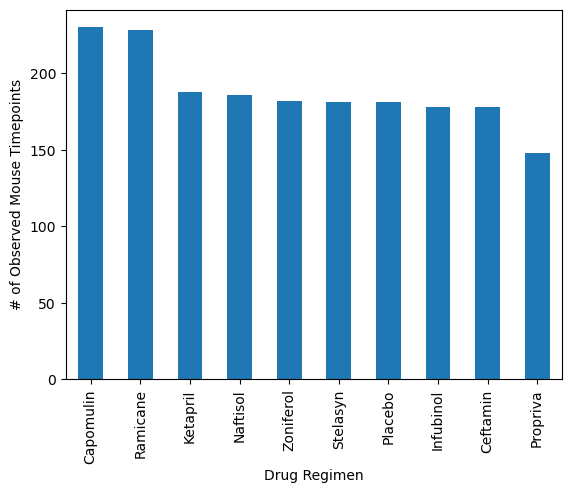

In [48]:
# Generating a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_bar_plot = clean_study_data["Drug Regimen"].value_counts().plot(kind="bar", xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints")
drug_regimen_bar_plot

In [49]:
# Generating a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
unique_drug_regimens = clean_study_data["Drug Regimen"].unique()
x_axis = np.arange(len(unique_drug_regimens))
x_axis


NameError: name 'np' is not defined